# Empirical Constraints on the Black Hole Sun


[Earl Patrick Bellinger](https://earlbellinger.com)$^1$

$^1$_Max Planck Institute for Astrophysics, Garching, Germany_

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import integrate
from scipy import interpolate

import matplotlib as mpl
import matplotlib.pyplot as plt

import re
import tomso.gyre as gyre
import tomso.fgong as fgong

import tomso

from tqdm import tqdm_notebook as tqdm

In [2]:
import os
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use(os.environ['SCRIPTS_DIR'] + '/matplotlibrc')

In [3]:
normal = pd.read_table('LOGS_normal/history.data', skiprows=5, sep='\s+')
normal

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_h1,center_he4,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_iters
0,1,706,1.000000e-05,-5.000000,1.0,33.298506,-99.0,0.0,1.0,0.003102,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,2
1,2,706,2.200000e-05,-4.920819,1.0,33.298506,-99.0,0.0,1.0,0.003188,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,2
2,3,706,3.640000e-05,-4.841638,1.0,33.298506,-99.0,0.0,1.0,0.003189,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,3
3,4,706,5.368000e-05,-4.762456,1.0,33.298506,-99.0,0.0,1.0,0.003188,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,2
4,5,706,7.441600e-05,-4.683275,1.0,33.298506,-99.0,0.0,1.0,0.003189,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,383,782,4.209833e+09,8.078868,1.0,33.298506,-99.0,0.0,1.0,0.980073,...,0.383424,0.597707,0.000017,0.008181,0.003119,0.008569,0.674472,0.306328,0,5
383,384,782,4.329011e+09,8.076196,1.0,33.298506,-99.0,0.0,1.0,0.980230,...,0.373266,0.607864,0.000017,0.008144,0.003119,0.008569,0.673324,0.307470,0,5
384,385,782,4.447447e+09,8.073482,1.0,33.298506,-99.0,0.0,1.0,0.980390,...,0.363106,0.618022,0.000018,0.008103,0.003119,0.008569,0.672171,0.308617,0,5
385,386,782,4.565136e+09,8.070737,1.0,33.298506,-99.0,0.0,1.0,0.980538,...,0.352945,0.628182,0.000018,0.008059,0.003119,0.008569,0.671015,0.309768,0,5


In [84]:
DF = pd.read_table('../rse/LOGS/history.data', skiprows=5, sep='\s+')
DF

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_iters,M_BH,L_BH,R_B,M_dot,dm/dt
0,2,706,2.200000e-05,-4.920819,1.0,33.298506,-99.0,0.000000,1.000000,0.003102,...,0.008569,0.709298,0.272354,0,2,1.000000e-10,0.000011,8.718202e-07,2.416891e-25,0.000000e+00
1,3,706,3.640000e-05,-4.841638,1.0,33.298506,-99.0,0.000000,1.000000,0.003034,...,0.008569,0.709298,0.272354,0,3,1.000000e-10,0.000011,8.718202e-07,2.416891e-25,8.237298e-23
2,4,706,5.368000e-05,-4.762456,1.0,33.298506,-99.0,0.000000,1.000000,0.003035,...,0.008569,0.709298,0.272354,0,3,1.000000e-10,0.000011,8.718202e-07,2.416891e-25,9.884758e-23
3,5,706,7.441600e-05,-4.683275,1.0,33.298506,-99.0,0.000000,1.000000,0.003036,...,0.008569,0.709298,0.272354,0,5,1.000000e-10,0.000011,8.718202e-07,2.416891e-25,1.186171e-22
4,6,706,9.929920e-05,-4.604094,1.0,33.298506,-99.0,0.000000,1.000000,0.003035,...,0.008569,0.709298,0.272354,0,4,1.000000e-10,0.000011,8.718202e-07,2.416891e-25,1.423405e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,352,773,8.128413e+08,7.174975,1.0,33.298487,-99.0,0.000000,1.000000,0.975822,...,0.008569,0.703358,0.277719,3,7,4.375825e-05,0.427206,2.781844e-01,9.150856e-21,3.315188e-05
351,353,781,8.248105e+08,7.078065,1.0,33.298481,-99.0,0.000000,1.000000,0.974588,...,0.008569,0.703327,0.277715,3,5,5.836350e-05,1.604586,3.806069e-01,3.437064e-20,1.460524e-05
352,354,780,8.343859e+08,6.981155,1.0,33.298474,-99.0,0.000000,0.994153,0.964022,...,0.008569,0.703314,0.277711,3,8,7.339023e-05,2.063616,5.323171e-01,4.420318e-20,1.502673e-05
353,355,760,8.420462e+08,6.884245,1.0,33.298464,-99.0,0.000097,0.955661,0.928568,...,0.008569,0.703298,0.277705,3,11,9.652292e-05,3.971005,1.050652e+00,8.505993e-20,2.313269e-05


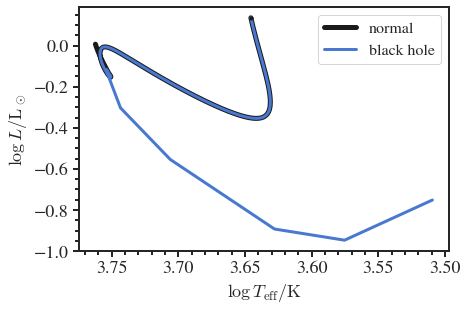

In [85]:
plt.plot(normal['log_Teff'], normal['log_L'], lw=5, c='k', label='normal')
#plt.plot(normal['log_Teff'].values[0], normal['log_L'].values[0], 'k.')

plt.plot(DF['log_Teff'], DF['log_L'], lw=3, label='black hole')
plt.plot(DF['log_Teff'].values[1], DF['log_L'].values[1], 'k.')

plt.gca().invert_xaxis()
plt.xlabel(r'$\log\,T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'$\log\,L/\rm{L}_\odot$')
plt.legend()
#plt.suptitle('HRD')
plt.show()

In [86]:
prof = pd.read_table('../rse/LOGS/profile37.data', skiprows=5, sep='\s+')
prof

,zone,mass,logR,logT,logRho,logP,x_mass_fraction_H,y_mass_fraction_He,z_mass_fraction_metals
0,1,1.000000,-0.042859,3.753819,-6.717385,4.844334,0.709298,0.272383,0.018319
1,2,1.000000,-0.042860,3.754664,-6.711564,4.851000,0.709298,0.272383,0.018319
2,3,1.000000,-0.042862,3.755855,-6.703693,4.860065,0.709298,0.272383,0.018319
3,4,1.000000,-0.042863,3.757421,-6.693826,4.871501,0.709298,0.272383,0.018319
4,5,1.000000,-0.042866,3.759398,-6.682187,4.885120,0.709298,0.272383,0.018319
...,...,...,...,...,...,...,...,...,...
775,776,0.000004,-2.096411,7.136431,1.947129,17.200378,0.662962,0.318202,0.018836
776,777,0.000004,-2.099242,7.136431,1.947132,17.200379,0.662957,0.318207,0.018836
777,778,0.000003,-2.100679,7.136431,1.947133,17.200380,0.662955,0.318210,0.018836
778,779,0.000003,-2.101403,7.136431,1.947149,17.200380,0.662908,0.318256,0.018836


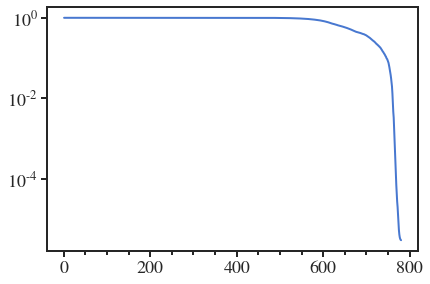

In [87]:
plt.plot(prof.zone, prof.mass)
plt.semilogy()
plt.axhline(0, ls='--', c='k')

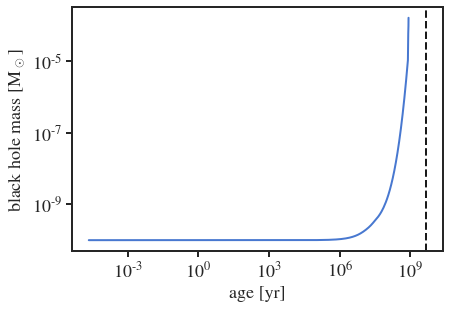

In [88]:
plt.plot(DF.star_age, DF.M_BH)
plt.semilogx()
plt.semilogy()
plt.axvline(4.579e9, ls='--', c='k')
plt.xlabel('age [yr]')
plt.ylabel(r'black hole mass [M$_\odot$]')
plt.show()

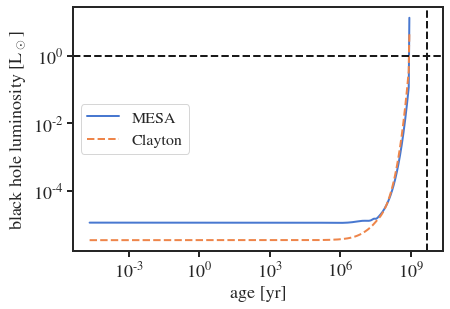

In [89]:
plt.plot(DF.star_age, DF.L_BH, label='MESA', lw=2)
plt.plot(DF.star_age, DF.M_BH / 10**-5 * 0.34, label='Clayton', ls='--', lw=2)
plt.semilogx()
plt.semilogy()
plt.axhline(1, ls='--', c='k')
plt.axvline(4.579e9, ls='--', c='k')
plt.legend()
plt.xlabel('age [yr]')
plt.ylabel(r'black hole luminosity [L$_\odot$]')
plt.show()